In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

In [4]:
# Read in the data
df = pd.read_csv('/Users/helenamabey/Stats_Spring_2025/Real_estate.csv')

In [6]:
df.head()

,No,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
# Used ChatGPT to help update the given date format to a usable date format. Defined a function to capture a standard date as described
# in the initial data definition table in homework.
from datetime import datetime, timedelta

def decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    start_of_year = datetime(year, 1, 1)
    days_in_year = (datetime(year + 1, 1, 1) - start_of_year).days
    actual_date = start_of_year + timedelta(days=remainder * days_in_year)
    return actual_date.strftime("%Y-%m-%d")

df['Transaction date'] = [decimal_year_to_date(d) for d in df['Transaction date']]

df.head()

,No,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
# Correct the Transaction date data type
df['Transaction date'] = pd.to_datetime(df['Transaction date'])
df.head()

,No,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
# Confirmed the data type has been updated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   No                                   414 non-null    int64         
 1   Transaction date                     414 non-null    datetime64[ns]
 2   House age                            414 non-null    float64       
 3   Distance to the nearest MRT station  414 non-null    float64       
 4   Number of convenience stores         414 non-null    int64         
 5   Latitude                             414 non-null    float64       
 6   Longitude                            414 non-null    float64       
 7   House price of unit area             414 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 26.0 KB


In [14]:
# Obtain the summary statistics on the full data set
df.describe()

,No,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [17]:
# Obtain the summary statistics on the requested comparison features, House age and House price of unit area
df[['House age','House price of unit area']].describe()

,House age,House price of unit area
count,414.000000,414.000000
mean,17.712560,37.980193
std,11.392485,13.606488
min,0.000000,7.600000
25%,9.025000,27.700000
50%,16.100000,38.450000
75%,28.150000,46.600000
max,43.800000,117.500000


In [19]:
# Compute correlation between age and price: This shows that while there is a negative correlation between the two
# features, it is very small. House prices do fall as the age of a house increases but it is not a strong factor.
correlation = df[['House age', 'House price of unit area']].corr()
correlation

,House age,House price of unit area
House age,1.000000,-0.210567
House price of unit area,-0.210567,1.000000


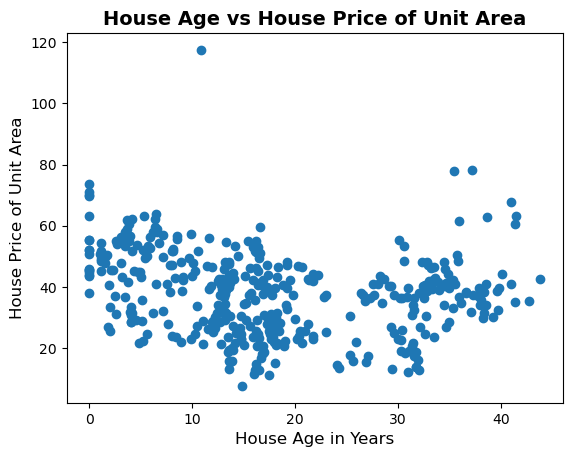

In [21]:
#Scatterplot House age vs House price of unit area: This shows that there may not be a strong relationship to age
# and price. There are a few outliers but generally the price results are similar regardless of house age.
plt.scatter(x=df['House age'], y=df['House price of unit area'])
plt.title('House Age vs House Price of Unit Area', fontsize=14, fontweight='bold')
plt.xlabel("House Age in Years", fontsize=12)
plt.ylabel("House Price of Unit Area", fontsize=12)
plt.show()

In [25]:
# import dependencies
import seaborn as sns

<Axes: xlabel='House age', ylabel='House price of unit area'>

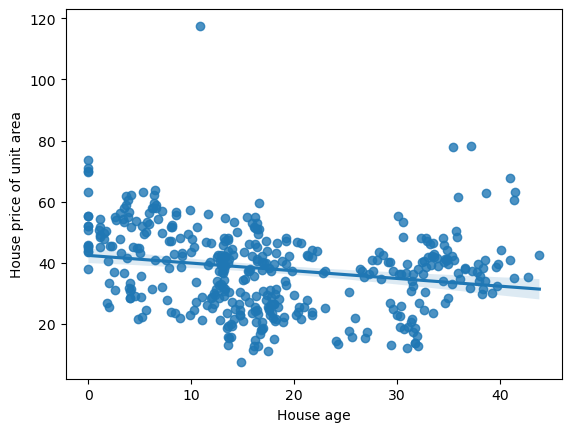

In [26]:
# Regression plot house age and price: This shows the slight negative relationship between
# these two factors. This confirms the correlation results we previously reviewed that age has a minimal impact on price. 
sns.regplot(data=df, x='House age', y='House price of unit area')

In [29]:
# Import dependencies for linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# y is vector and X is matrix, if mult you add other characteristics

# Define the feature and target
X = df[['House age']]
y = df['House price of unit area']

model = LinearRegression()
reg=model.fit(X, y)

In [31]:
# Display the model coefficients first is slope, second is intercept
model.coef_, model.intercept_

(array([-0.25148842]), 42.4346970462629)

In [35]:
# Install statsmodels to use packages 
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
# Import dependencies
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats

In [39]:
# Define the features: house age and targetand house price
X = df[['House age']]
y = df['House price of unit area']

# Add a constant (for intercept in the regression model)
X_with_const = sm.add_constant(X)

# Create the linear regression model using statsmodels 
# ordinaryleast squares. 
model_sm = sm.OLS(y, X_with_const).fit()

In [41]:
# Print Model Summary
model_summary = model_sm.summary()
print(model_summary)

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.044
Model:                                  OLS   Adj. R-squared:                  0.042
Method:                       Least Squares   F-statistic:                     19.11
Date:                      Sun, 02 Mar 2025   Prob (F-statistic):           1.56e-05
Time:                              07:45:37   Log-Likelihood:                -1658.3
No. Observations:                       414   AIC:                             3321.
Df Residuals:                           412   BIC:                             3329.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

## Regression function for House Age vs House Price of Unit area (Y=a+bX)

#### The best fitting line is Y = 42.435 - 0.25*X based on this model

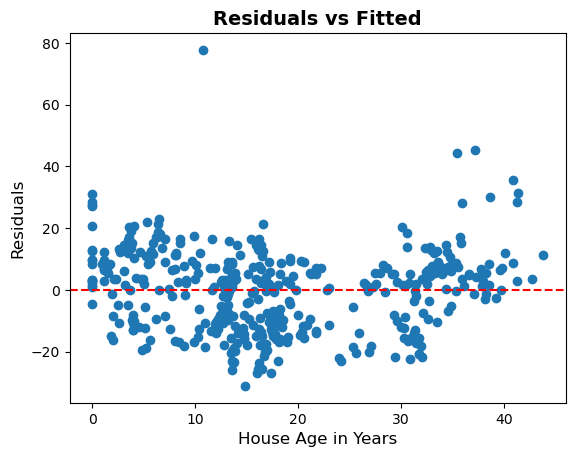

In [44]:
# Graph the residuals (errors)
residuals = model_sm.resid

# Plot residuals vs. fitted values
plt.scatter(df['House age'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('House Age in Years', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Fitted', fontsize=14, fontweight='bold')
plt.show()